# Loading Dataset

In [1]:
import numpy as np
import tensorflow as tf 
import NeuralNetwork as nn

In [2]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_test[0].shape
X_batch = X_test[0:10000]
X_batch.shape

(10000, 32, 32, 3)

# Plotting first image in the train dataset.

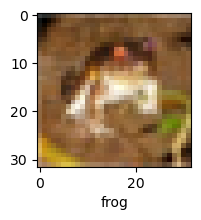

In [3]:
import matplotlib.pyplot as plt

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
def plot_data(X, y, index):
    plt.figure(figsize=(10, 2))  # Scaling the image
    plt.imshow(X[index])
    plt.xlabel(classes[(y[index])[0]]) # Because y_train[index] return [val]

plot_data(X_train, y_train, 0)

# Embedding the X_train and X_test images into vector.

In [4]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalising raw pixels
# X_train = X_train.astype(np.float32) / 255.0
# X_test  = X_test.astype(np.float32) / 255.0


# One hot y_labels before training.
My backward pass assumes one hot labels during gradient calculation(dA). So, numpy was silently breaking learning which resulted in argmax always returning 0 hence giving accuracy of 100% everyt epoch.
### Solution:
reshaping y_labels on both train and test to be one_hot.

In [5]:
def one_hot(y, num_classes=10):
    y = y.flatten()
    oh = np.zeros((y.shape[0], num_classes))
    oh[np.arange(y.shape[0]), y] = 1
    return oh

# Example
print(y_test[:5])

y_train = one_hot(y_train)
y_test  = one_hot(y_test)

# Example:
print(y_test[:5])

y_test.shape

[[3]
 [8]
 [8]
 [0]
 [6]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


(10000, 10)

# Creating a small sample data from cifar10 for testing train method. (10% to be precise below)

In [6]:
SAMPLE_PERCENT = 0.1 
n_total_train = len(X_train)
n_sample_train = int(SAMPLE_PERCENT * n_total_train)

# Create random indices for the training subset
np.random.seed(42) # for reproducibility
train_indices = np.random.choice(n_total_train, size=n_sample_train, replace=False)

# Creating random indices for the validation subset (e.g., 500 samples)
# We can use the test set as the validation set for this initial trial
n_sample_val = 500 # A small, fixed number for quick validation

# Extract the subsets
X_train_sample = X_train[train_indices]
y_train_sample = y_train[train_indices]

# Use the first 500 images from the main test set as a quick validation set
X_val_sample = X_test[:n_sample_val]
y_val_sample = y_test[:n_sample_val]

# Embedding the image into vector
X_train_sample = X_train_sample.reshape(X_train_sample.shape[0], -1)
X_val_sample = X_val_sample.reshape(X_val_sample.shape[0], -1)

print(f"Training subset shape: {X_train_sample.shape}, Labels shape: {y_train_sample.shape}")
print(f"Validation subset shape: {X_val_sample.shape}, Labels shape: {y_val_sample.shape}")

Training subset shape: (5000, 3072), Labels shape: (5000, 10)
Validation subset shape: (500, 3072), Labels shape: (500, 10)


# Making a model using NeuralNetwork Class

In [7]:
    # def __init__(self, input_size: int, hidden_layers: list[int], output_size: int, 
    #           activations: list[str], dropout_rates=None, regularisation=None, 
    #              reg_lambda=0.01, seed=0):

# Model with dropout at 50%
model_small_sample = nn.NeuralNetwork(
    input_size=3072,
    hidden_layers=[4, 2],  #one hidden layer
    output_size=10,
    activations=["sigmoid","relu", "softmax"],
    dropout_rates=[0.5, 0.1]  #dropout on hidden layer
)

    # def train(self, X, y, X_val, y_val, 
    #             epochs=10, batch_size=64, lr=0.01, decay=0.0, optimizer=None):
model_small_sample.train(
    X=X_train_sample,
    y=y_train_sample,
    X_val=X_val_sample,
    y_val=y_val_sample,
    epochs=5,        # Running more epoch for smaller data.
    batch_size=32,    # Smaller batch size might work better with smaller data
    lr=0.01
    # optimizer=...
)


# model_actual = nn.NeuralNetwork(
#     input_size=3072,
#     hidden_layers=[4],  #one hidden layer
#     output_size=10,
#     activations=["relu", "softmax"],
#     dropout_rates=[0.0000001]  #dropout on hidden layer
# )

# model_actual.train(
#     X=X_train,
#     y=y_train,
#     X_val=X_test,
#     y_val=y_test,
#     epochs=10,       
#     batch_size=32,
#     lr=0.001
#     # optimizer=...
# )


Epoch 1 / 5, Accuracy: 10.2000%
Epoch 2 / 5, Accuracy: 10.2000%
Epoch 3 / 5, Accuracy: 10.2000%
Epoch 4 / 5, Accuracy: 10.2000%
Epoch 5 / 5, Accuracy: 10.2000%
Training Completed!!!
